In [1]:
import pandas as pd
import numpy as np
import re
import nltk

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score

In [2]:
# download 'stopwords' package from nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ashiq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Data Preparation**

In [3]:
# load the data
df = pd.read_csv('train.csv')
print(f"The shape of the dataset is: {df.shape}")
df.head()

The shape of the dataset is: (20800, 5)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

# **Data Preprocessing**

Handling null values

In [6]:
df.fillna(" ", inplace= True)
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [7]:
# merging author and title features
df['content'] = df['title'] + " " + df['author']

In [8]:
df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [9]:
print(df.groupby(['label'])['content'].count())

label
0    10387
1    10413
Name: content, dtype: int64


In [10]:
df.drop(columns=['author', 'title'], inplace=True)

In [11]:
X = df['content']
y = df['label']

In [12]:
print(X)

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Consortiumne...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799              What Keeps the F-35 Alive David Swanson
Name: content, Length: 20800, dtype: object


**Stemming**

In [13]:
# Stemming reducing words from the text
port_stem = PorterStemmer()

In [14]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [15]:
df['content']  = df['content'].apply(stemming)
df['content'].head()

0    hous dem aid even see comey letter jason chaff...
1    flynn hillari clinton big woman campu breitbar...
2               truth might get fire consortiumnew com
3    civilian kill singl us airstrik identifi jessi...
4    iranian woman jail fiction unpublish stori wom...
Name: content, dtype: object

In [16]:
# create X and y for training
# use content feature for X value and labels to y
# not using of Text feature since have large text parhagraphs

X = df['content'].values
y = df['label'].values
print(X[0:10])
print(y[0:10])

['hous dem aid even see comey letter jason chaffetz tweet darrel lucu'
 'flynn hillari clinton big woman campu breitbart daniel j flynn'
 'truth might get fire consortiumnew com'
 'civilian kill singl us airstrik identifi jessica purkiss'
 'iranian woman jail fiction unpublish stori woman stone death adulteri howard portnoy'
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart daniel nussbaum'
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight'
 'beno hamon win french socialist parti presidenti nomin new york time alissa j rubin'
 'excerpt draft script donald trump q ampa black church pastor new york time'
 'back channel plan ukrain russia courtesi trump associ new york time megan twohey scott shane']
[1 0 1 1 1 0 1 0 0 0]


In [17]:
# converting text data to numerical

vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [18]:
print(X[:1],'------->',y[:1])

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766 -------> [1]


In [19]:
# split data training and testing

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify= y , random_state= 42)

Logistic Regression:

Accuracy: 0.9725961538461538
Precision: 0.9733067389586729
Recall: 0.9725961538461538
F1 Score: 0.9725851637101036
Confusion Matrix:
[[2970  146]
 [  25 3099]]

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3116
           1       0.96      0.99      0.97      3124

    accuracy                           0.97      6240
   macro avg       0.97      0.97      0.97      6240
weighted avg       0.97      0.97      0.97      6240

------------------------------------------------------------


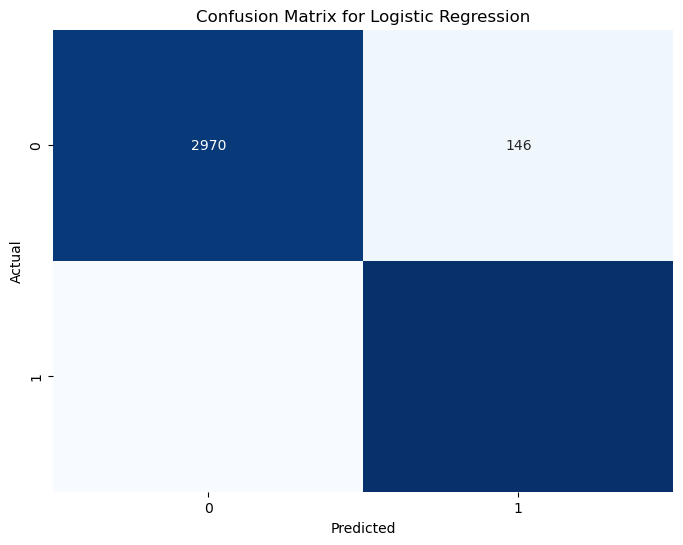

In [ ]:

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier(),
    'K Nearest Neighbor': KNeighborsClassifier(),
    'Gradient Boost': GradientBoostingClassifier()
}

# Dictionary to store the metrics for each classifier
metrics = {}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    metrics[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm
    }

    print(f"{name}:\n")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{cm}\n")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

    # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:
# Plotting the accuracies
algorithms = list(metrics.keys())
accuracies = [metrics[algo]['accuracy'] for algo in algorithms]

plt.figure(figsize=(10, 6))
plt.bar(algorithms, accuracies, color='skyblue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Algorithms')
plt.xticks(rotation=45)
plt.show()

In [ ]:
algorithm=["LR" , "GB" , "DT","SVM","KNN"]
accuracy_score = [0.972, 0.964 , 0.991,0.987,0.515]
sns.lineplot(x=algorithm, y=accuracy_score, marker=0)
plt.xlabel('algorithm')
plt.ylabel('accuracy')
plt.title('accuracy vs algorithm')
plt.show()

# **Predictive system with Decision Tree**

In [ ]:
#From our analysis, it's clear that the decision tree is more accurate.

In [ ]:
model=DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
# prediction_system function
def prediction_system():
    recent_predictions = []

    while True:
        print("\n--- Fake News Detection System ---")
        print("1. Predict a news article")
        print("2. View recent predictions")
        print("3. Quit")
        choice = input("Enter your choice: ")

        if choice == '1':
            content = input('Enter a news article: ')
            stem_content = stemming(content)
            X = vectorizer.transform([stem_content])
            prediction = model.predict(X)

            result = 'Fake News' if prediction==0 else 'Real News'

            confidence = max(model.predict_proba(X)[0])

            recent_predictions.append((content, result, confidence))

            print(f"Prediction: {result}")
            print(f"Confidence: {confidence * 100:.2f}%")

        elif choice == '2':
            print("\n--- Recent Predictions ---")
            for i, (article, result, confidence) in enumerate(recent_predictions):
                print(f"{i + 1}. {result} ({confidence * 100:.2f}% confidence) - {article[:50]}...")

        elif choice == '3':
            print("Exiting the system. Goodbye!")
            break

        else:
            print("Invalid choice. Please try again.")

#News after stemming

#'hous dem aid even see comey letter jason chaffetz tweet darrel lucu - 1'
#'flynn hillari clinton big woman campu breitbart daniel j flynn - 0'
#'truth might get fire consortiumnew com - 1'
#'civilian kill singl us airstrik identifi jessica purkiss - 1'
#'iranian woman jail fiction unpublish stori woman stone death adulteri howard portnoy - 1'
#'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart daniel nussbaum - 0'
#'life life luxuri elton john favorit shark pictur stare long transcontinent flight - 1'
#'beno hamon win french socialist parti presidenti nomin new york time alissa j rubin -0'
#'excerpt draft script donald trump q ampa black church pastor new york time - 0'
#'back channel plan ukrain russia courtesi trump associ new york time megan twohey scott shane -0'

# Run the interactive system
prediction_system()
